In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
titanic2=pd.read_csv(r"C:\Users\Russhi\Desktop\BOOTCAMP\titanic_limpio.csv", sep=',')

In [3]:
# Columnas que no son de interés.
titanic2.drop(['Unnamed: 0', 'PassengerId','MarriedName',
       'FullName'], axis=1, inplace=True)

In [4]:
titanic_reg=titanic2[['Pclass', 'Sex',
       'Age', 'SibSp', 'Parch','Fare',
       'Level','Embarked']].copy()

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(drop='first', sparse_output=False)
columnas=['Sex', 'Level', 'Embarked']
categorical_data = titanic_reg[columnas]
encoded_categorical_data = pd.DataFrame(encoder.fit_transform(categorical_data))
encoded_categorical_data.columns = encoder.get_feature_names_out(columnas)
titanic_reg = titanic_reg.drop(['Sex', 'Level', 'Embarked'], axis=1)
encoded_data = pd.concat([titanic_reg, encoded_categorical_data], axis=1)

In [6]:
X = encoded_data.drop(columns = ['Fare'], axis=1).copy() 
y = encoded_data.Fare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=357)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
modelos = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Random Forest', RandomForestRegressor(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100)),
    ('Support Vector Regressor', SVR()),
    ('Neural Network', MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=500))
]

In [17]:
# Función para calcular el RMSE (Root Mean Squared Error)
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

c:\Users\Russhi\Desktop\BOOTCAMP\venv_analytics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


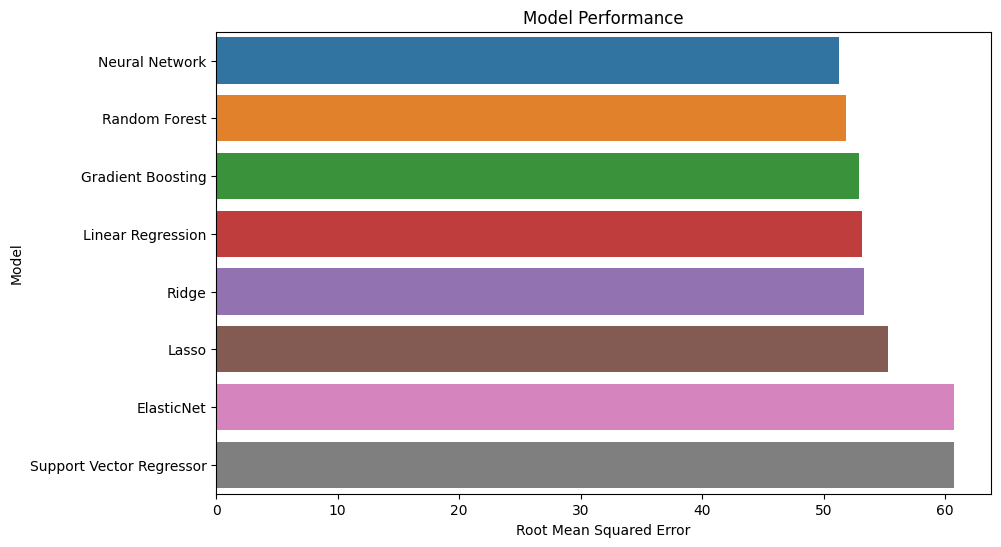

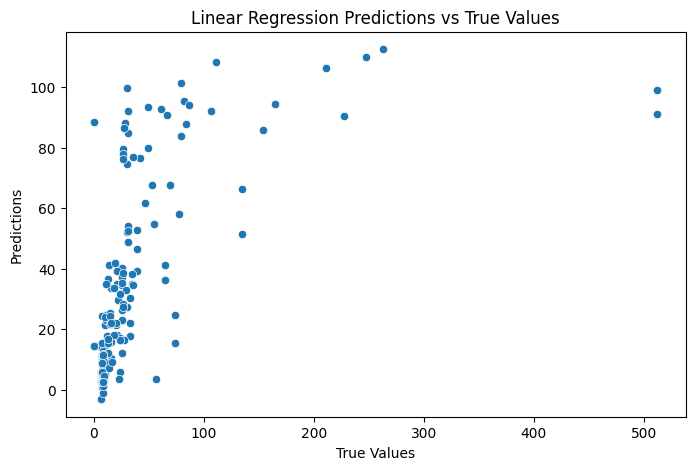

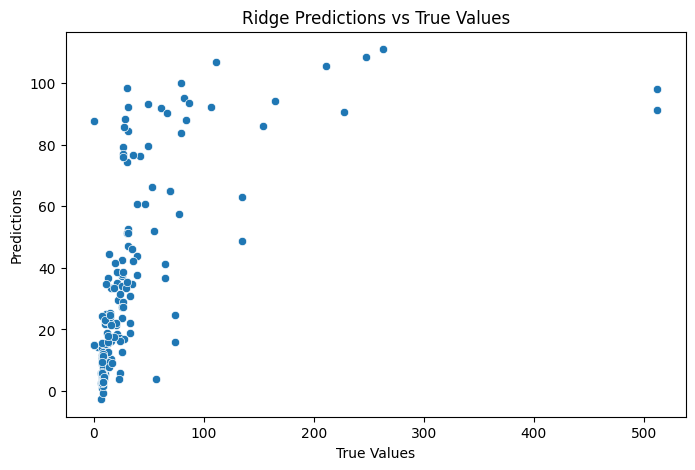

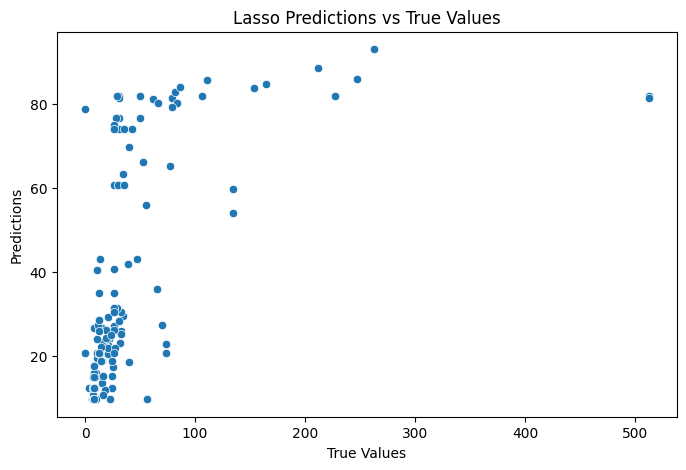

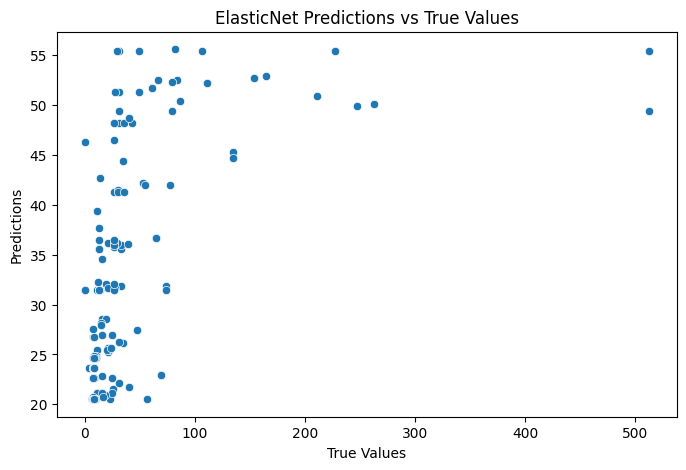

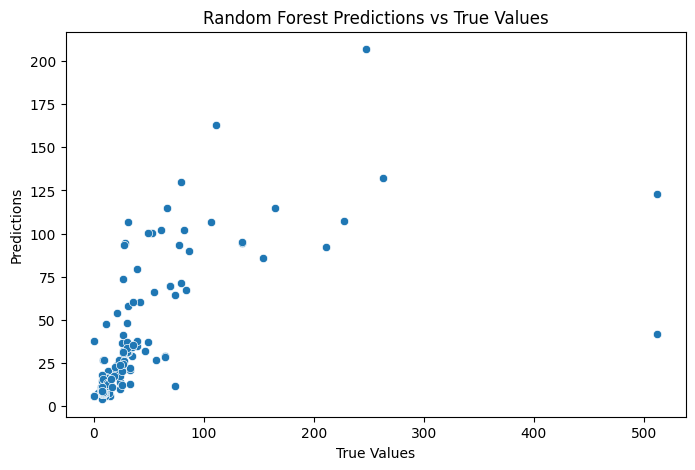

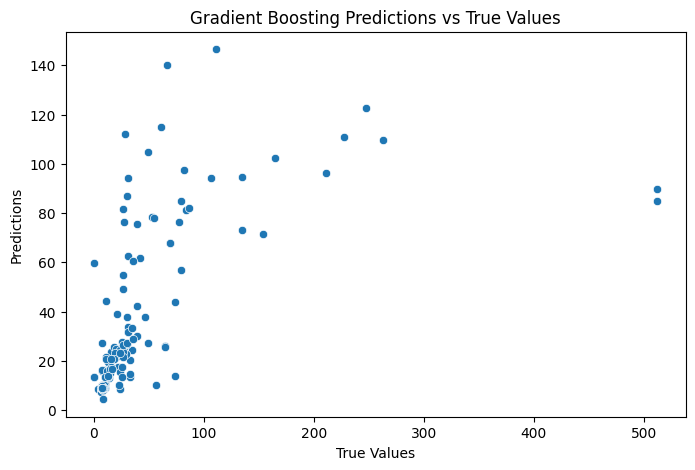

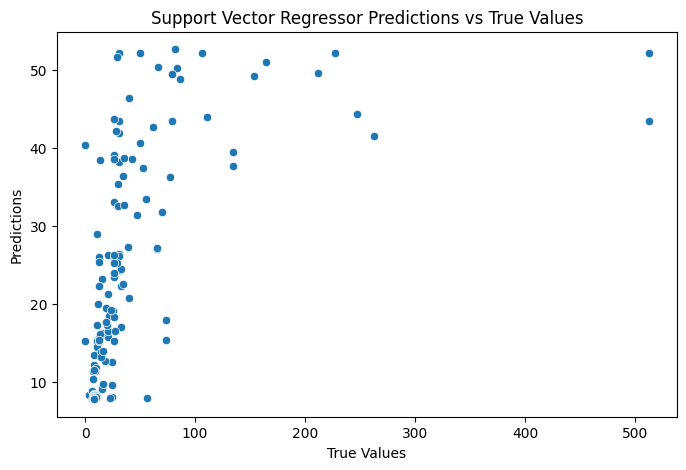

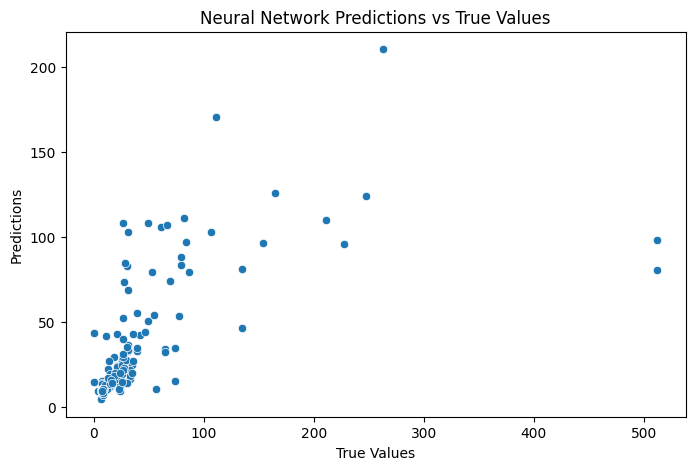

In [18]:
results = []

for name, model in modelos:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = RMSE(y_test, y_pred)
    results.append((name, rmse))

# Convertimos los resultados a un DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'RMSE'])

# Gráfica de barras de los RMSE de cada modelo
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df.sort_values('RMSE'))
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Model')
plt.title('Model Performance')
plt.show()

# Gráficos de dispersión para comparar predicciones vs valores reales
for name, model in modelos:
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{name} Predictions vs True Values')
    plt.show()

In [19]:
results_df

,Model,RMSE
0,Linear Regression,53.194943
1,Ridge,53.333533
2,Lasso,55.268589
3,ElasticNet,60.714616
4,Random Forest,51.854679
5,Gradient Boosting,52.908590
6,Support Vector Regressor,60.754098
7,Neural Network,51.265045


In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import wandb

In [9]:
hyperparameters ={
    'hidden_layer': [(100,50),(100,),(80,30),(50,50,50)], 'activation': ['relu','tanh','logistic'], 'solver':['adam'], 
    'alpha': [0.0001,0.0005,0.005,0.05], 'learning': ['constant','adaptive'], 'max_iter': [100,200,500,1000],
    'batch':[30,80,100,200,500], 'tol':[1e-4], 'beta_1':[0.9], 'beta_2':[0.999]}

In [ ]:
for hidden_layer_sizes in hyperparameters['hidden_layer']:
    for activation in hyperparameters['activation']:
        for solver in hyperparameters['solver']:
            for alpha in hyperparameters['alpha']:
                for learning_rate in hyperparameters['learning']:
                    for max_iter in hyperparameters['max_iter']:
                        for batch_size in hyperparameters['batch']:
                            for tol in hyperparameters['tol']:
                                for beta_1 in hyperparameters['beta_1']:
                                    for beta_2 in hyperparameters['beta_2']:

                                            # Initialize wandb
                                            experiment_name = f"nn_hidden{hidden_layer_sizes}_activation{activation}_solver{solver}_alpha{alpha}_lr{learning_rate}_maxiter{max_iter}"
                                            wandb.init(project="Titanic_reg2", name=experiment_name, config=hyperparameters)

                                            # Training
                                            reg = MLPRegressor(
                                                hidden_layer_sizes=hidden_layer_sizes,
                                                activation=activation,
                                                solver=solver,
                                                alpha=alpha,
                                                learning_rate=learning_rate,
                                                max_iter=max_iter,
                                                batch_size=batch_size,
                                                tol=tol,
                                                beta_1=beta_1,
                                                beta_2=beta_2,
                                                random_state=999
                                            )
                                            reg.fit(X_train, y_train)

                                            # Prediction
                                            y_pred = reg.predict(X_test)

                                            #Registro de HP
                                            wandb.config.hidden_layer_sizes = hidden_layer_sizes
                                            wandb.config.activation = activation
                                            wandb.config.solver = solver
                                            wandb.config.alpha = alpha
                                            wandb.config.learning_rate = learning_rate
                                            wandb.config.max_iter = max_iter
                                            wandb.config.batch_size = batch_size
                                            wandb.config.tol= tol
                                            wandb.config.beta_1 = beta_1
                                            wandb.config.beta_2 = beta_2

                                            # Calculate metrics
                                            mse = mean_squared_error(y_test, y_pred)
                                            r2 = r2_score(y_test, y_pred)

                                            # Log metrics to wandb
                                            wandb.log({"mse": mse, "r2": r2})

                                            # Finish the experiment
                                            wandb.finish()

link: https://wandb.ai/alba-m-boga/Titanic_reg2/reports/MLPRegressor-Model-for-Titanic-Fare--Vmlldzo0ODM1MjI0